# Practica de clasificacion ML

In [46]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

In [47]:
census_test = pd.read_csv("census_test.csv") # cargamos fichero
census_test.head(5)                                   # visualizamos 5 primeras filas


,id,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,28,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Own-child,Black,Female,0.0,0.0,40.0,United-States
1,1,35,Private,HS-grad,9.0,Separated,Prof-specialty,Other-relative,Black,Female,0.0,0.0,40.0,United-States
2,2,33,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,30.0,United-States
3,3,18,Private,HS-grad,9.0,Never-married,Sales,Not-in-family,White,Male,0.0,0.0,30.0,United-States
4,4,53,Private,Assoc-voc,11.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States


In [48]:

census_train = pd.read_csv("census_train.csv")

census_train.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,Private,Masters,14.0,Divorced,Sales,Unmarried,Other,Female,0.0,0.0,20.0,Peru,<=50K
1,43,Private,Assoc-acdm,12.0,Divorced,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999.0,0.0,37.0,United-States,>50K
3,23,Private,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,3908.0,0.0,40.0,United-States,<=50K
4,32,Private,Some-college,10.0,Divorced,Handlers-cleaners,Unmarried,Black,Male,0.0,0.0,40.0,Nicaragua,<=50K


In [49]:
census_train.dtypes != 'object'

age                 True
workclass          False
education_level    False
education-num       True
marital-status     False
occupation         False
relationship       False
race               False
sex                False
capital-gain        True
capital-loss        True
hours-per-week      True
native-country     False
income             False
dtype: bool

Primero de todo vamos a transformar las variables object a 
variables numericas


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

census_train_copy = census_train

le.fit(census_train_copy['workclass'])

census_train_copy['workclass'] = le.transform(census_train_copy['workclass'])

le.fit(census_train_copy['education_level'])

census_train_copy['education_level'] = le.transform(census_train_copy['education_level'])

le.fit(census_train_copy['marital-status'])

census_train_copy['marital-status'] = le.transform(census_train_copy['marital-status'])

le.fit(census_train_copy['occupation'])

census_train_copy['occupation'] = le.transform(census_train_copy['occupation'])

le.fit(census_train_copy['relationship'])

census_train_copy['relationship'] = le.transform(census_train_copy['relationship'])

le.fit(census_train_copy['race'])

census_train_copy['race'] = le.transform(census_train_copy['race'])

le.fit(census_train_copy['sex'])

census_train_copy['sex'] = le.transform(census_train_copy['sex'])

le.fit(census_train_copy['native-country'])

census_train_copy['native-country'] = le.transform(census_train_copy['native-country'])

le.fit(census_train_copy['income'])

census_train_copy['income'] = le.transform(census_train_copy['income'])

census_train_copy.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,2,12,14.0,0,11,4,3,0,0.0,0.0,20.0,28,0
1,43,2,7,12.0,0,2,1,4,1,0.0,0.0,40.0,38,0
2,53,2,10,16.0,2,9,5,4,0,99999.0,0.0,37.0,38,1
3,23,2,11,9.0,2,0,5,4,0,3908.0,0.0,40.0,38,0
4,32,2,15,10.0,0,5,4,2,1,0.0,0.0,40.0,26,0


In [51]:
census_train.dtypes != 'object'

age                True
workclass          True
education_level    True
education-num      True
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain       True
capital-loss       True
hours-per-week     True
native-country     True
income             True
dtype: bool

Analizaremos como estan distribuidas las muestras para income

In [52]:
census_train_copy['income'].value_counts() / census_train_copy.shape[0]

0    0.752163
1    0.247837
Name: income, dtype: float64

Las variables no estan bien distribuidas por lo tanto en el momento de entrenar deberemos estratificar los datos. 

Seguidamente pasaremos a mirar datos anomalos como outliers.

Y despues pasemos a mirar la correlacion entre las variables independientes.



In [53]:
census_train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36177.0,38.598751,13.229011,17.0,28.0,37.0,47.0,90.0
workclass,36177.0,2.205877,0.963834,0.0,2.0,2.0,2.0,6.0
education_level,36177.0,10.314786,3.824565,0.0,9.0,11.0,12.0,15.0
education-num,36177.0,10.113663,2.553911,1.0,9.0,10.0,13.0,16.0
marital-status,36177.0,2.579678,1.498088,0.0,2.0,2.0,4.0,6.0
occupation,36177.0,5.964701,4.026909,0.0,2.0,6.0,9.0,13.0
relationship,36177.0,1.408519,1.596411,0.0,0.0,1.0,3.0,5.0
race,36177.0,3.681842,0.830472,0.0,4.0,4.0,4.0,4.0
sex,36177.0,0.677088,0.467596,0.0,0.0,1.0,1.0,1.0
capital-gain,36177.0,1088.861735,7506.099972,0.0,0.0,0.0,0.0,99999.0


Vemos como capital-gain tiene outliers por tanto pasemos a eliminarlos

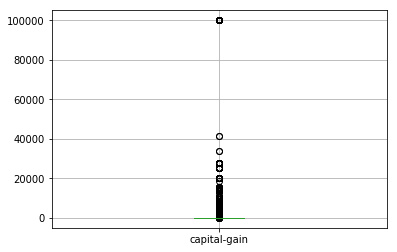

In [10]:
census_train_copy.boxplot(column=['capital-gain'])

In [11]:
census_train_copy = census_train_copy[census_train_copy['capital-gain'] < 1000 * 1.5]
census_train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,33308.0,38.154948,13.196505,17.0,28.0,37.0,47.0,90.0
workclass,33308.0,2.202204,0.960085,0.0,2.0,2.0,2.0,6.0
education_level,33308.0,10.285937,3.878583,0.0,9.0,11.0,12.0,15.0
education-num,33308.0,10.024649,2.526568,1.0,9.0,10.0,12.0,16.0
marital-status,33308.0,2.609313,1.514226,0.0,2.0,2.0,4.0,6.0
occupation,33308.0,5.947190,4.030315,0.0,2.0,6.0,9.0,13.0
relationship,33308.0,1.448901,1.593344,0.0,0.0,1.0,3.0,5.0
race,33308.0,3.675453,0.836673,0.0,4.0,4.0,4.0,4.0
sex,33308.0,0.667918,0.470967,0.0,0.0,1.0,1.0,1.0
capital-gain,33308.0,3.101867,57.065946,0.0,0.0,0.0,0.0,1471.0


La idea de ese valor de outlier es coger el Q3 * 1.5 (pero como el Q3 esta basado en 0 cogemos la media)

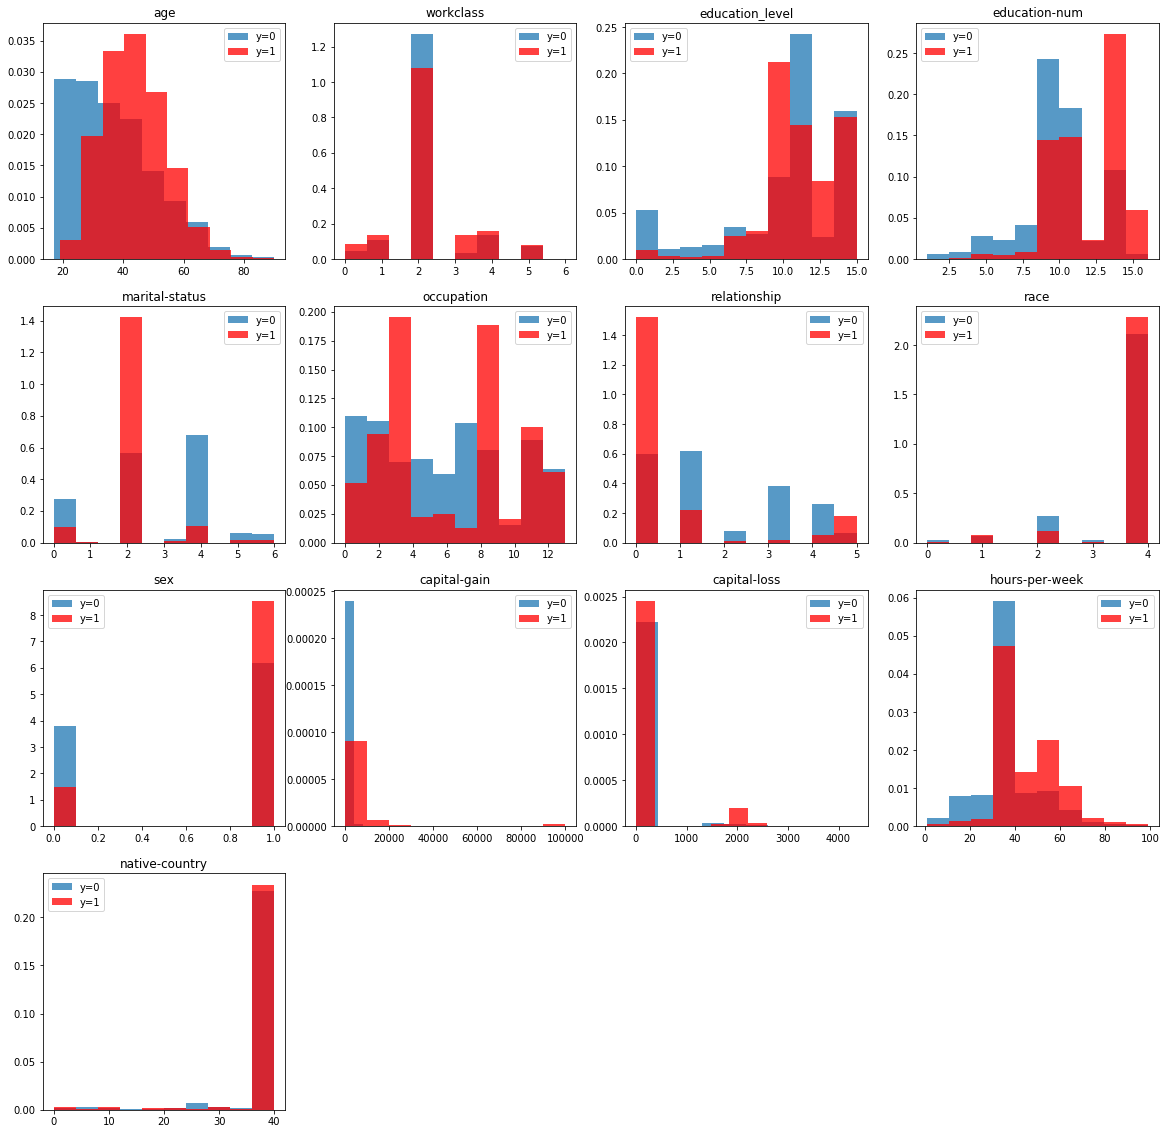

In [54]:
# Pintamos histogramas para cada clase
plt.figure(figsize=(20,20))
census_train_copy_cp = census_train_copy

idx_0 =  census_train_copy_cp['income'] == 0
idx_1 =  census_train_copy_cp['income'] == 1

for i,feature in enumerate(census_train_copy_cp.columns.drop(['income'])):
    plt.subplot(4,4,i+1)   
    plt.hist(census_train_copy_cp.ix[idx_0,feature],density=1, alpha=0.75,label='y=0')
    plt.hist(census_train_copy_cp.ix[idx_1,feature],density=1, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

Pasaremos ahora a analizar la correlacion entre variables

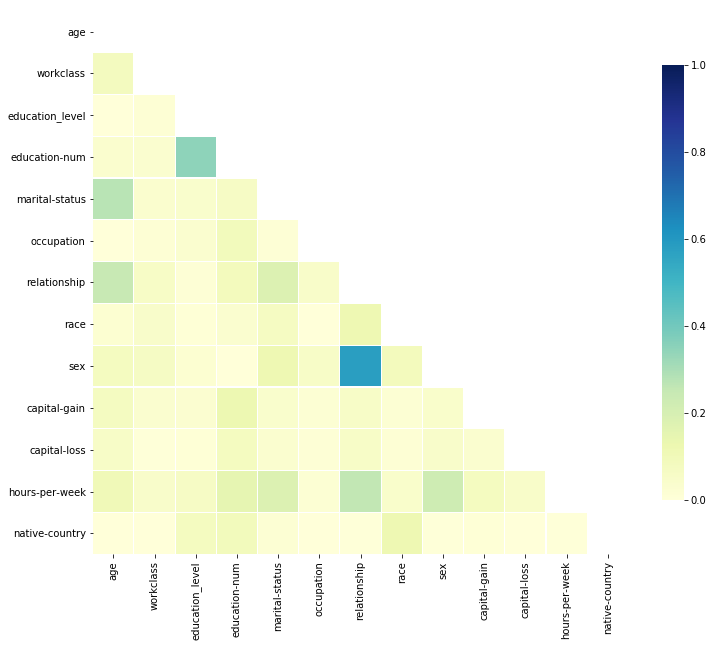

In [55]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(census_train_copy_cp.drop(['income'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [56]:
census_train_copy_cp.corr() # matriz de correlación

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.084402,-0.001432,0.037319,-0.275307,-0.001703,-0.248550,0.023517,0.080524,0.076624,0.057884,0.103336,-0.001395,0.232893
workclass,0.084402,1.000000,0.016201,0.034907,-0.035330,0.018844,-0.061704,0.048267,0.070293,0.031622,0.007743,0.050451,0.003894,0.015285
education_level,-0.001432,0.016201,1.000000,0.350213,-0.039148,-0.033931,-0.015046,0.011307,-0.026025,0.028440,0.010401,0.065226,0.078428,0.081115
education-num,0.037319,0.034907,0.350213,1.000000,-0.066026,0.090475,-0.087583,0.032182,0.001315,0.124173,0.078829,0.148721,0.092176,0.335063
marital-status,-0.275307,-0.035330,-0.039148,-0.066026,1.000000,0.015154,0.180854,-0.070631,-0.118629,-0.041884,-0.033510,-0.183583,-0.021735,-0.191689
occupation,-0.001703,0.018844,-0.033931,0.090475,0.015154,1.000000,-0.052504,0.000956,0.057674,0.020634,0.013329,0.020241,-0.000776,0.051949
relationship,-0.248550,-0.061704,-0.015046,-0.087583,0.180854,-0.052504,1.000000,-0.119220,-0.581484,-0.055272,-0.057204,-0.259033,-0.005666,-0.254412
race,0.023517,0.048267,0.011307,0.032182,-0.070631,0.000956,-0.119220,1.000000,0.089427,0.019930,0.019021,0.044688,0.120582,0.072590
sex,0.080524,0.070293,-0.026025,0.001315,-0.118629,0.057674,-0.581484,0.089427,1.000000,0.043935,0.047670,0.229106,-0.005161,0.215131
capital-gain,0.076624,0.031622,0.028440,0.124173,-0.041884,0.020634,-0.055272,0.019930,0.043935,1.000000,-0.031625,0.081747,0.008201,0.218774


A pesar de que parece que sex con relationship pueda tener correlacion los valores no son los suficientemente altos, por tanto vemos como no hay una alta correlacion entre las variables. Pasemos a analizar si hay valores nulos

In [57]:
census_train_copy_cp.isnull().any()

age                False
workclass          False
education_level    False
education-num      False
marital-status     False
occupation         False
relationship       False
race               False
sex                False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

Una vez tenemos los datos limpios y hemos hecho un análisis exploratorio pasemos a analizar el mejor conjunto de características para poder entrenar nuestro modelo

Primero de todo intentaremos hacer una busqueda de las variables mas importantes

## Búsqueda de variables 

C:\Users\alberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\alberto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alberto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


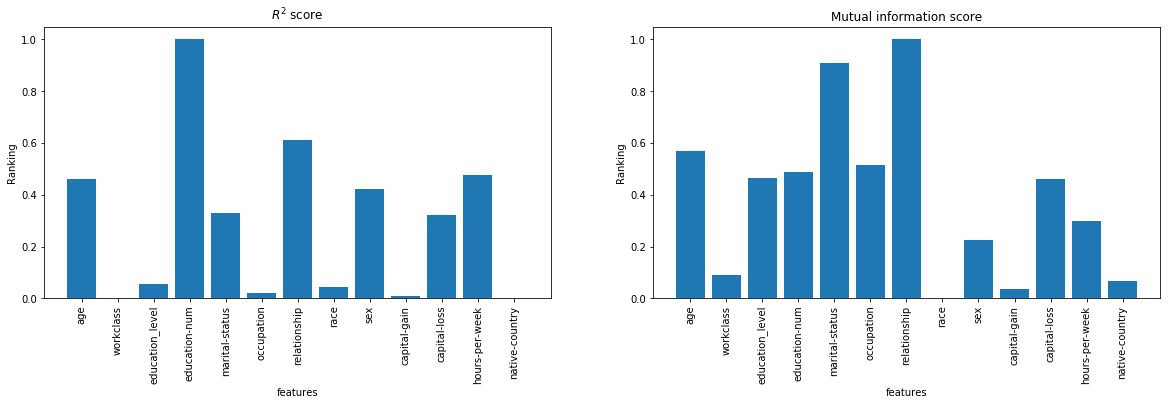

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
data = census_train_copy_cp.as_matrix() 

y = data[:,13:14]     # nos quedamos con la columna income
X = data[:,0:13]      # nos quedamos con el resto

feature_names = census_train_copy_cp.columns[0:13]


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

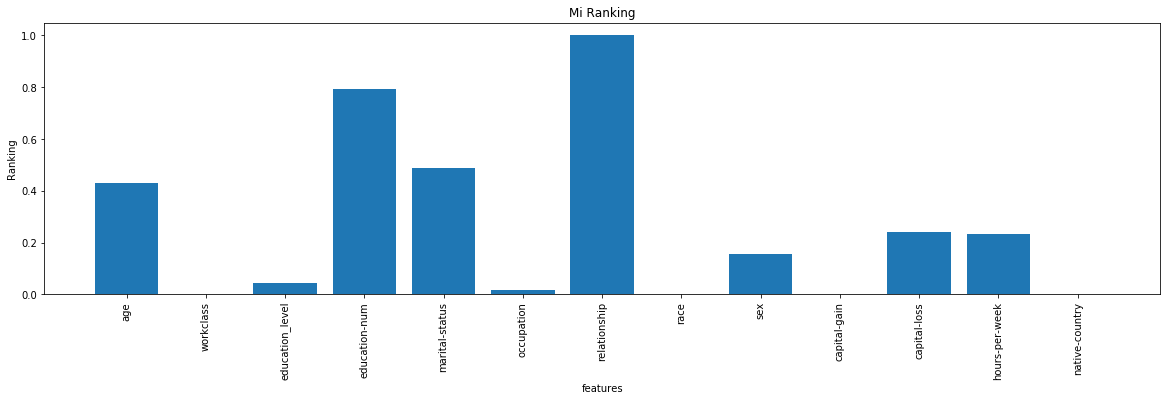

In [34]:
mi_ranking = f_test*mi
mi_ranking = mi_ranking / np.max(mi_ranking)

plt.figure(figsize=(20, 5))
plt.bar(range(X.shape[1]),mi_ranking, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mi Ranking')
plt.show()

A primera vista parece que es relevante la educacion-num, relationship, marital-status

A partir de ahora analizaremos la matriz de confunsion en diferentes modelos con algoritmos de machine learning y miraremos las métricas cual es la que mejor se ajusta

In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [59]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [60]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

Separamos los datos primero de todo

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# preparamos los datos
census_train_copy_cp_clean = census_train_copy_cp

columns_to_drop = ['income']
features = census_train_copy_cp_clean.columns.drop(columns_to_drop)

X = census_train_copy_cp_clean[features].values
y = census_train_copy_cp_clean['income'].values


# PASO 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, shuffle= True, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))


Datos train:  (27132, 13)
Datos test:   (9045, 13)
Propocion train:0.248
Propocion test: 0.248


# Logistic regresion

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1).fit(Xs_train,y_train)
y_pred = lr.predict(Xs_train)

In [45]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([19645,  5336], dtype=int64))

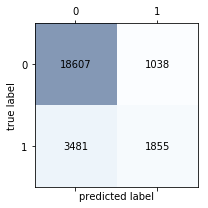

In [46]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)

# Podemos acceder a los valores de la matriz
tn, fp, fn, tp = confusion_matrix(y_train,y_pred).ravel()

ACC:  0.8191025179136143
SEN:  0.3476386806596702
ESP:  0.9471621277678799
PPV:  0.6412029035603181
FSC:  0.4508445740673229


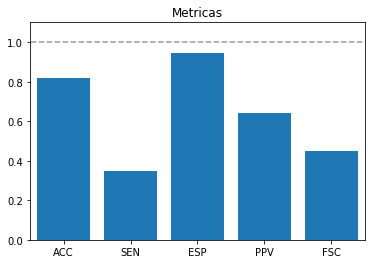

In [47]:
calcula_metricas(confmat)

ACC:  0.8217845562627597
SEN:  0.3372681281618887
ESP:  0.9534208918753818
PPV:  0.6629834254143646
FSC:  0.44709388971684055


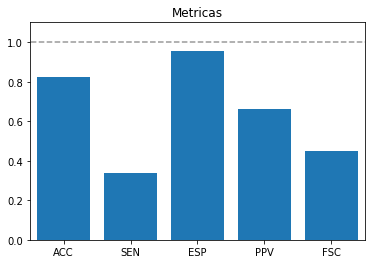

In [48]:
y_pred_test = lr.predict(Xs_test)
confmat_test = confusion_matrix(y_test,y_pred_test)
calcula_metricas(confmat_test)

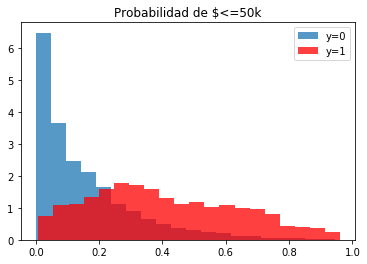

In [49]:
y_prob = lr.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0],density=1, bins = 20, alpha=0.75,label='y=0')
plt.hist(y_prob[idx_1],density=1, bins= 20, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.title('Probabilidad de $<=50k')
plt.show()

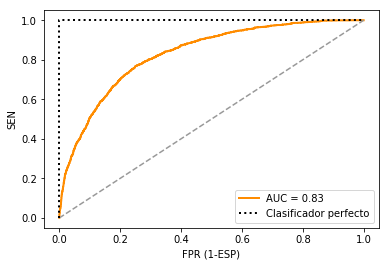

In [50]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Ok, vemos como la accuracy no esta demasiado bien, es de un 0.85.
En la probabilidad de ser 0 o 1 vemos mucho solapamiento por tanto podríamos tener muchos falsos positivos. Y la matriz de confusion el SEM es muy bajo

Vamos a ver si con otros algoritmos nos acercamos más a 1 el AUC. Como por ejemplo una regresion logística pero modificando los pesos de error ya que es un conjunto desbalanceado.


# Logistic regresion + update weight

best mean cross-validation score: 0.558
best parameters: {'C': 0.015848931924611134}


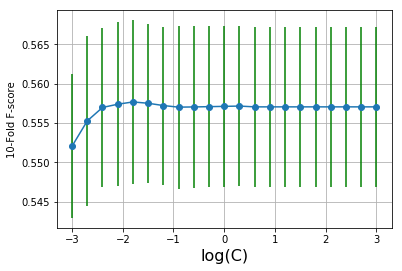

In [51]:
from sklearn.model_selection import GridSearchCV
    
vectorC = np.logspace(-3,3,21)
param_grid = {'C': vectorC }

grid = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'), #
                    scoring='f1', # vosotros podéis probar a poner acc
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold F-score')
plt.grid()
plt.show()

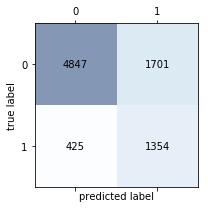

ACC:  0.7446859613306113
SEN:  0.7611017425519955
ESP:  0.7402260232131949
PPV:  0.4432078559738134
FSC:  0.5601985932974762


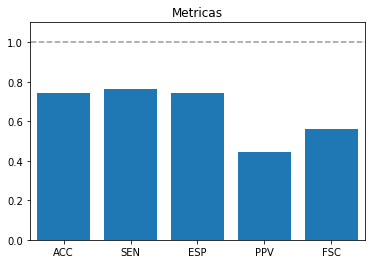

In [56]:
from sklearn.metrics import confusion_matrix
Copt = grid.best_params_['C']

lr = LogisticRegression(random_state=0, C = Copt, class_weight='balanced').fit(Xs_train,y_train)
y_pred = lr.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

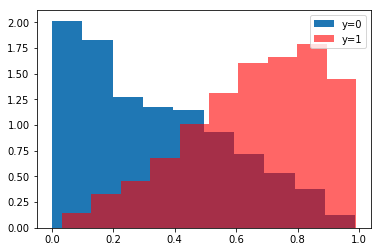

In [63]:
y_prob = lr.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], density = 1, label = 'y=0')
plt.hist(y_prob[idx_1], density = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

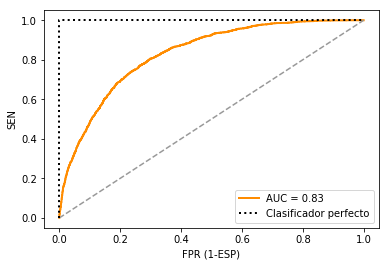

In [64]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

SEN ha mejorado pero hemos sacrificado accuracy. No hemos mejorado, pasemos a utilizar árboles de decisión

## Decision Tree classifier

best mean cross-validation score: 0.671
best parameters: {'max_depth': 12}


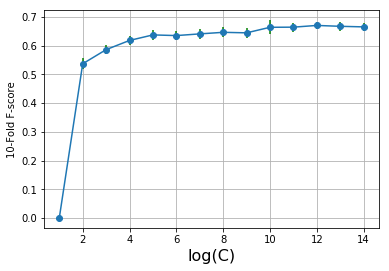

In [62]:
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth}
#param_grid = {'max_depth': maxDepth, 'class_weight' : [None,'balanced'] }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), #
                    scoring='f1', # vosotros podéis probar a poner acc
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold F-score')
plt.grid()
plt.show()

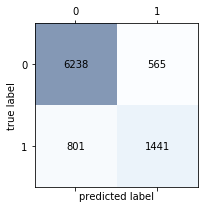

ACC:  0.8489773355444997
SEN:  0.6427297056199821
ESP:  0.9169484051153902
PPV:  0.7183449651046859
FSC:  0.6784369114877589


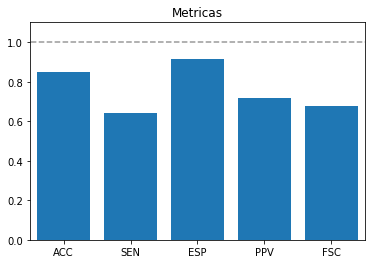

In [63]:
max_depth_opt = grid.best_params_['max_depth']

dt = DecisionTreeClassifier(random_state=0, max_depth = max_depth_opt).fit(Xs_train,y_train)
y_pred = dt.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

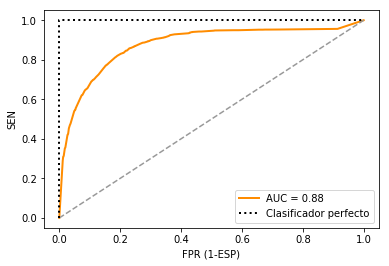

In [67]:
from sklearn.metrics import roc_curve, auc

y_prob = dt.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

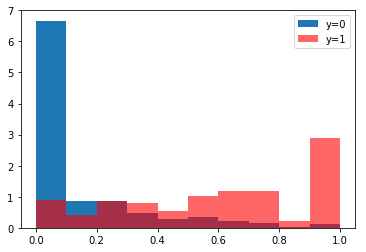

In [68]:
idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], density = 1, label = 'y=0')
plt.hist(y_prob[idx_1], density = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

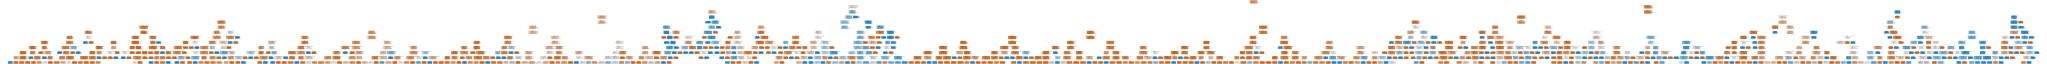

In [69]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

Hemos mejorado el accuracy y el SEM pero seguimos estando lejos de tener el SEM a un nivel decente. Y en la gráfica igualmente vemos como tambien se ha reducidor el número de falsos-positivos que podriamos obtener

Pasemos a utilizar un algoritmo de random forest

## Random forest classifier

best mean cross-validation score: 0.644
best parameters: {'max_depth': 14}


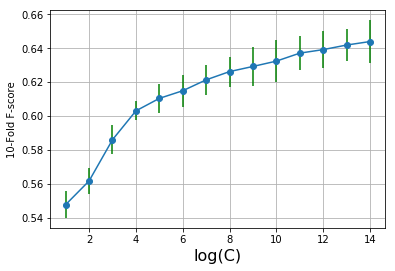

In [72]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}

#param_grid = {'max_depth': maxDepth, 'class_weight' : [None,'balanced'] }
grid = GridSearchCV(RandomForestClassifier(random_state=0, 
                                           n_estimators = 200, 
                                           max_features = 'sqrt', 
                                           class_weight = 'balanced'), 
                    scoring='f1', # vosotros podéis probar a poner acc
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold F-score')
plt.grid()
plt.show()

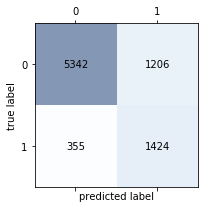

ACC:  0.8125375285216765
SEN:  0.8004496908375491
ESP:  0.8158216249236409
PPV:  0.5414448669201521
FSC:  0.6459514629167612


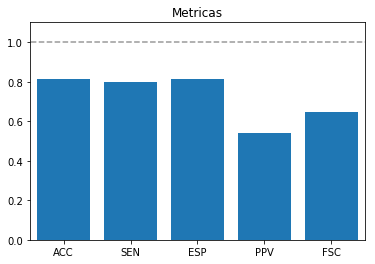

In [73]:
max_depth_opt = grid.best_params_['max_depth']

rf = RandomForestClassifier(random_state=0, 
                            max_depth = max_depth_opt, 
                            n_estimators = 200, 
                            max_features = 'sqrt', 
                            class_weight = 'balanced').fit(Xs_train,y_train)
y_pred = rf.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

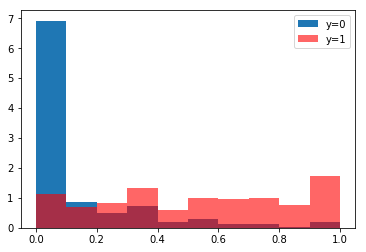

In [74]:
idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], density = 1, label = 'y=0')
plt.hist(y_prob[idx_1], density = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

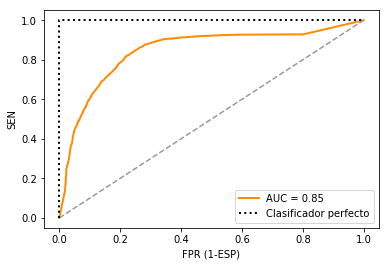

In [75]:
y_prob = dt.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Con el random forest hemos mejorado el Accuracy y el SEM por tanto de momento pinta como el mejor algoritmo de prediccion

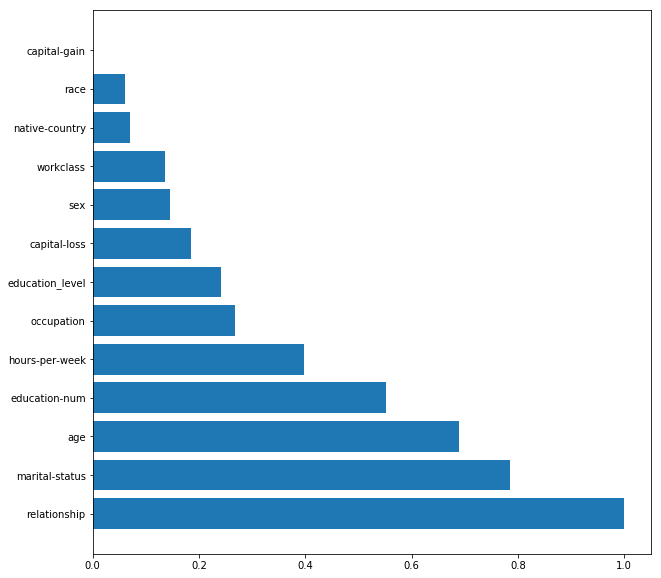

In [76]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Vemos como las variables mas importantes concuerdan con las analizadas anteriormente, pasaremos Ahora analizaremos ungradient boosting classifier

## Gradient boosting classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
# max_depth = [2,3,4,5]
# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 3)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

y_pred = rf.predict(Xs_test)

best mean cross-validation score: 0.858
best parameters: {'learning_rate': 0.5, 'n_estimators': 100}


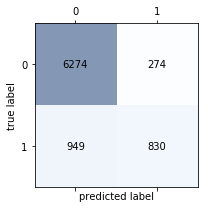

ACC:  0.8531283775669509
SEN:  0.46655424395727935
ESP:  0.9581551618814905
PPV:  0.7518115942028986
FSC:  0.5757891085674645


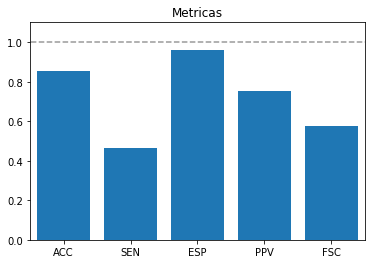

In [78]:
rf = GradientBoostingClassifier(random_state=0, max_depth=2).fit(Xs_train,y_train)
y_pred = rf.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)




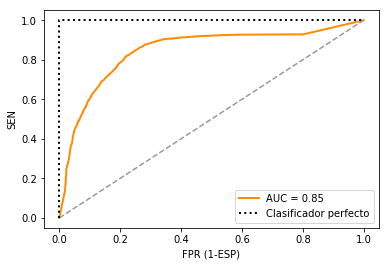

In [79]:
y_prob = dt.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

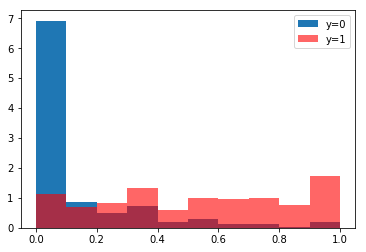

In [80]:
idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], density = 1, label = 'y=0')
plt.hist(y_prob[idx_1], density = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

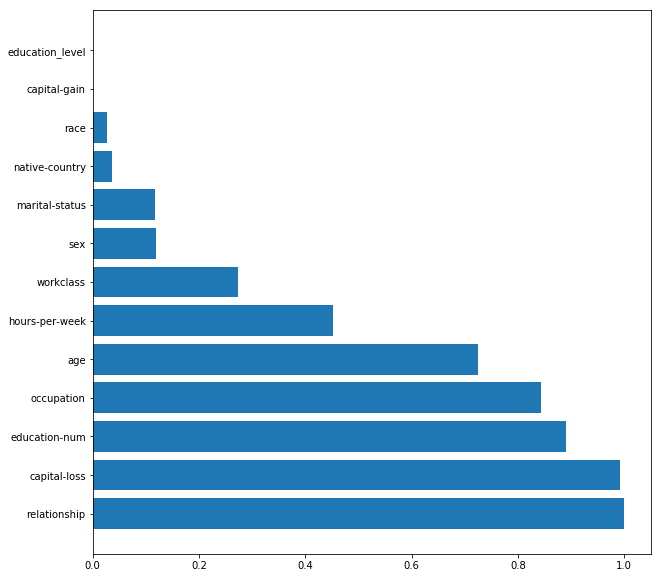

In [81]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Vemos como este clasificador funciona muy parecido al anterior, pero hemos vuelto a perder potencia en SEN. Aunque si comparamos las variables mas importantes en este caso nos salen más variables. Por tanto de momento creo que me quedaré con el random forest.

Pasemos a nalizar ahora un SVM 



## SVC

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Paso 2: Búsqueda de parámtros libres
vectorC = np.logspace(-1, 3, 20)
vectorG = np.logspace(-9, -1, 20)

param_grid = {'C': vectorC, 'gamma':vectorG}

grid = GridSearchCV(SVC(kernel='rbf'), scoring = 'accuracy', param_grid = param_grid, cv = 3)
grid.fit(Xs_train, y_train)
######

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-01, 1.62378e-01, 2.63665e-01, 4.28133e-01, 6.95193e-01,
       1.12884e+00, 1.83298e+00, 2.97635e+00, 4.83293e+00, 7.84760e+00,
       1.27427e+01, 2.06914e+01, 3.35982e+01, 5.45559e+01, 8.85867e+01,
       1.43845e+02, 2.33572e+02, 3.79269e+02, 6.15848e+02, 1.00000e... 2.97635e-04, 7.84760e-04,
       2.06914e-03, 5.45559e-03, 1.43845e-02, 3.79269e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

best mean cross-validation score: 0.842
best parameters: {'C': 2.9763514416313175, 'gamma': 0.1}


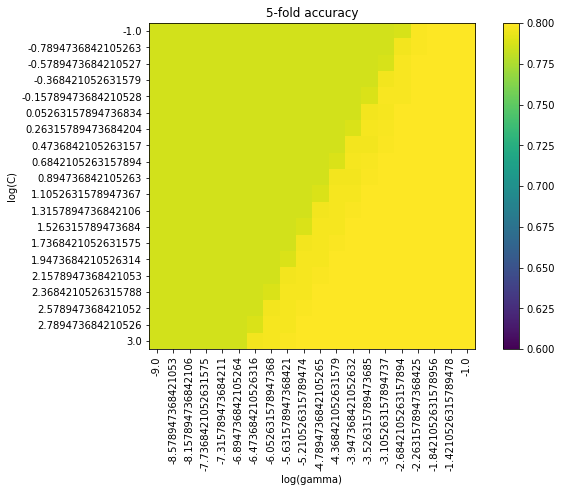

In [40]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('20-fold accuracy')
plt.show()

In [41]:
# Paso 3
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svm = SVC(kernel='rbf',gamma = Gopt, C = Copt).fit(Xs_train,y_train)

print('Acc (Train): %0.2f'%svm.score(Xs_train,y_train))
print('Acc (TEST): %0.2f'%svm.score(Xs_test,y_test))

Acc (Train): 0.85
Acc (TEST): 0.85


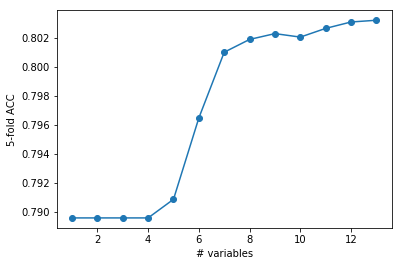

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel='linear') # ¡sólo funciona con Kernel Lineal!

rfecv = RFECV(estimator=svc, step=1, cv=5, scoring='accuracy')
rfecv.fit(Xs_train, y_train)

plt.figure()
plt.xlabel("# variables")
plt.ylabel("5-fold ACC")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, '-o')
plt.show()

In [43]:
print('Variables seleccionadas: ',[f for f in features[rfecv.support_]] )
print('Acc (TEST): %0.2f'%rfecv.score(Xs_test,y_test))


Variables seleccionadas:  ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
Acc (TEST): 0.80


In [44]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=svc, step=1, n_features_to_select= 4).fit(Xs_train,y_train)
print('Variables seleccionadas: ',[f for f in features[rfe.support_]] )

print('Acc (TEST): %0.2f'%rfe.score(Xs_test,y_test))

Variables seleccionadas:  ['age', 'education-num', 'sex', 'capital-loss']
Acc (TEST): 0.79


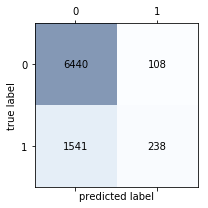

ACC:  0.8019694968175813
SEN:  0.13378302417088253
ESP:  0.9835064141722664
PPV:  0.6878612716763006
FSC:  0.22400000000000003


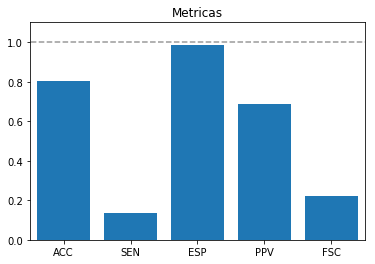

In [45]:
from sklearn.metrics import confusion_matrix


y_pred = rfecv.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

Podemos observar como el valor de SEN en este caso es mucho peor que en los algoritmos anteriores.

Una vez analizadas las mejores variables para nuestro modelo y encontrado el mejor algoritmo de prediccion, pasemos a usarlo en el conjunto de train

# Modelo final

In [70]:

census_test = pd.read_csv("census_test.csv")

census_test.head(5)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

census_test_copy = census_test

le.fit(census_test_copy['workclass'])

census_test_copy['workclass'] = le.transform(census_test_copy['workclass'])

le.fit(census_test_copy['education_level'])

census_test_copy['education_level'] = le.transform(census_test_copy['education_level'])

le.fit(census_test_copy['marital-status'])

census_test_copy['marital-status'] = le.transform(census_test_copy['marital-status'])

le.fit(census_test_copy['occupation'])

census_test_copy['occupation'] = le.transform(census_test_copy['occupation'])

le.fit(census_test_copy['relationship'])

census_test_copy['relationship'] = le.transform(census_test_copy['relationship'])

le.fit(census_test_copy['race'])

census_test_copy['race'] = le.transform(census_test_copy['race'])

le.fit(census_test_copy['sex'])

census_test_copy['sex'] = le.transform(census_test_copy['sex'])

le.fit(census_test_copy['native-country'])

census_test_copy['native-country'] = le.transform(census_test_copy['native-country'])
census_test_copy.head(5)

,id,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,28,2,11,9.0,4,5,3,2,0,0.0,0.0,40.0,37
1,1,35,2,11,9.0,5,9,2,2,0,0.0,0.0,40.0,37
2,2,33,2,11,9.0,2,2,0,4,1,0.0,0.0,30.0,37
3,3,18,2,11,9.0,4,11,1,4,1,0.0,0.0,30.0,37
4,4,53,2,8,11.0,2,3,0,4,1,0.0,0.0,40.0,37


In [71]:
census_test_copy_cp = census_test_copy
census_test_copy_cp.head(10)

,id,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,28,2,11,9.0,4,5,3,2,0,0.0,0.0,40.0,37
1,1,35,2,11,9.0,5,9,2,2,0,0.0,0.0,40.0,37
2,2,33,2,11,9.0,2,2,0,4,1,0.0,0.0,30.0,37
3,3,18,2,11,9.0,4,11,1,4,1,0.0,0.0,30.0,37
4,4,53,2,8,11.0,2,3,0,4,1,0.0,0.0,40.0,37
5,5,37,2,12,14.0,2,3,0,4,1,0.0,1977.0,40.0,37
6,6,41,4,11,9.0,2,3,0,4,1,0.0,0.0,50.0,37
7,7,41,2,15,10.0,2,2,0,2,1,0.0,0.0,40.0,37
8,8,76,2,14,15.0,2,9,0,4,1,9386.0,0.0,25.0,37
9,9,38,0,15,10.0,4,0,1,4,0,0.0,1980.0,40.0,37


In [72]:
census_train_copy_cp_2 = census_train_copy
census_train_copy_cp_2.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,2,12,14.0,0,11,4,3,0,0.0,0.0,20.0,28,0
1,43,2,7,12.0,0,2,1,4,1,0.0,0.0,40.0,38,0
2,53,2,10,16.0,2,9,5,4,0,99999.0,0.0,37.0,38,1
3,23,2,11,9.0,2,0,5,4,0,3908.0,0.0,40.0,38,0
4,32,2,15,10.0,0,5,4,2,1,0.0,0.0,40.0,26,0
5,29,0,15,10.0,3,0,3,4,0,0.0,0.0,40.0,38,0
6,51,2,15,10.0,4,0,3,4,0,0.0,0.0,40.0,38,0
7,33,3,11,9.0,2,3,0,4,1,0.0,0.0,50.0,38,0
8,35,1,12,14.0,2,9,0,4,1,0.0,0.0,40.0,38,0
9,39,2,15,10.0,2,11,0,4,1,0.0,0.0,40.0,38,0


In [73]:
census_train_copy_cp_2.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,2,12,14.0,0,11,4,3,0,0.0,0.0,20.0,28,0
1,43,2,7,12.0,0,2,1,4,1,0.0,0.0,40.0,38,0
2,53,2,10,16.0,2,9,5,4,0,99999.0,0.0,37.0,38,1
3,23,2,11,9.0,2,0,5,4,0,3908.0,0.0,40.0,38,0
4,32,2,15,10.0,0,5,4,2,1,0.0,0.0,40.0,26,0
5,29,0,15,10.0,3,0,3,4,0,0.0,0.0,40.0,38,0
6,51,2,15,10.0,4,0,3,4,0,0.0,0.0,40.0,38,0
7,33,3,11,9.0,2,3,0,4,1,0.0,0.0,50.0,38,0
8,35,1,12,14.0,2,9,0,4,1,0.0,0.0,40.0,38,0
9,39,2,15,10.0,2,11,0,4,1,0.0,0.0,40.0,38,0


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# preparamos los datos
census_train_copy_cp_clean_2 = census_train_copy_cp_2

columns_to_drop = ['income']
features = census_train_copy_cp_clean_2.columns.drop(columns_to_drop)

X = census_train_copy_cp_clean_2[features].values
y = census_train_copy_cp_clean_2['income'].values

# PASO 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, shuffle= True, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

Datos train:  (27132, 13)
Datos test:   (9045, 13)
Propocion train:0.248
Propocion test: 0.248


best mean cross-validation score: 0.824
best parameters: {'max_depth': 14}


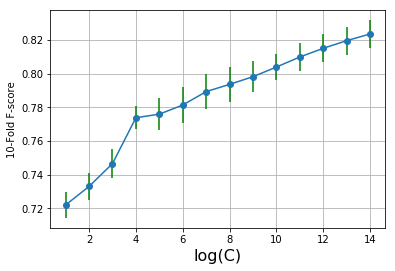

In [75]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}


grid = GridSearchCV(RandomForestClassifier(random_state=0, 
                                           n_estimators = 300, 
                                           max_features = 'sqrt',
                                           class_weight = 'balanced',
                                           ), 
                    scoring='accuracy', # vosotros podéis probar a poner acc
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold F-score')
plt.grid()
plt.show()

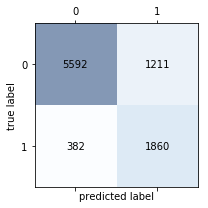

ACC:  0.8238805970149253
SEN:  0.8296164139161463
ESP:  0.8219902983977657
PPV:  0.6056659068707262
FSC:  0.7001693958215697


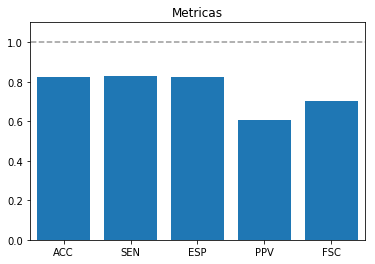

In [76]:
max_depth_opt = grid.best_params_['max_depth']

rf = RandomForestClassifier(random_state=0, 
                            max_depth = max_depth_opt, 
                            n_estimators = 300, 
                            max_features = 'sqrt', 
                            class_weight = 'balanced').fit(Xs_train,y_train)
y_pred = rf.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

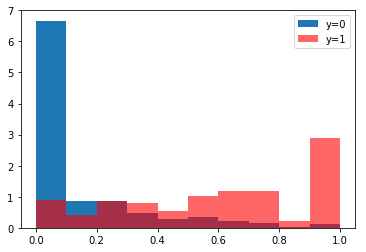

In [77]:
idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], density = 1, label = 'y=0')
plt.hist(y_prob[idx_1], density = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

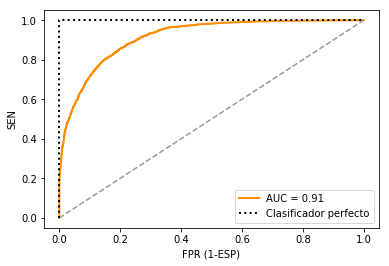

In [78]:
y_prob = rf.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [79]:
census_test_copy_cp_2 = census_test_copy_cp

census_test_copy_cp_2 = census_test_copy_cp_2.drop(['id'],axis=1)

y_pred = rf.predict(census_test_copy_cp_2)

print(y_pred)

[1 1 1 ... 1 0 1]


In [80]:
census_test_copy_cp_final = census_test_copy_cp
census_test_copy_cp_final['target'] = y_pred
census_test_copy_cp_final = census_test_copy_cp_final.drop(['age','workclass','education_level','occupation','race','capital-loss','native-country', 'education-num','marital-status','relationship','capital-gain','sex','hours-per-week'], axis = 1)
census_test_copy_cp_final.to_csv('census_test_result.csv')

In [81]:
census_test_copy_cp_final['target'].value_counts() / census_test_copy_cp_final.shape[0]

1    0.733665
0    0.266335
Name: target, dtype: float64

Como resumen final al final el f1 lo he cambiado a accuracy, he intentado quitarle el clas_weight balanced, porque el algoritmo de arbol deberia balancearse mejor, pero el SEM se reducir drásticamente